In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as sp
import math
import sympy.stats as sy

1. Пусть Xi ∼ N (0, 1).

1) Построить эмпирическую функцию распределения (ЭФР) на одном графике с теоретической функцией распределения при разных n (проиллюстрировать сходимость ЭФР к ф.р.). То же для Xi ∼ R[0, 1], Xi ∼ Bin(m, p), где m = 3, m = 10.

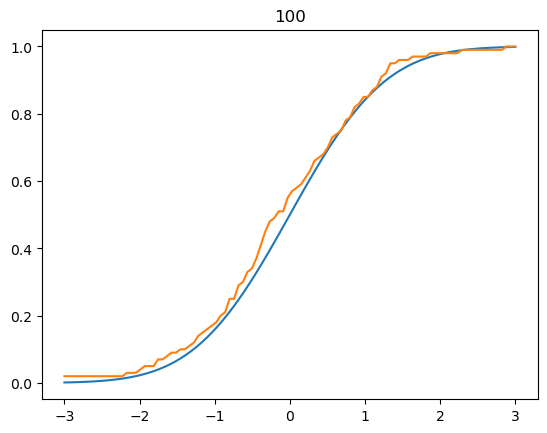

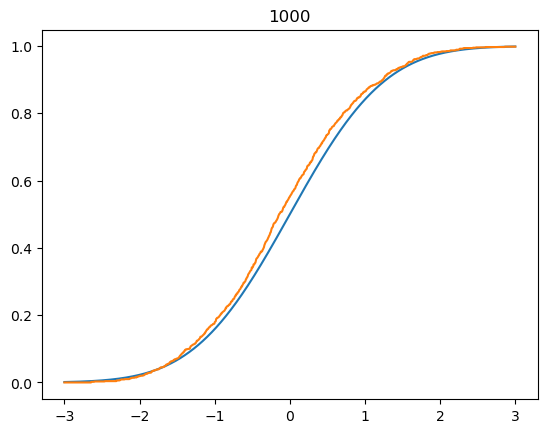

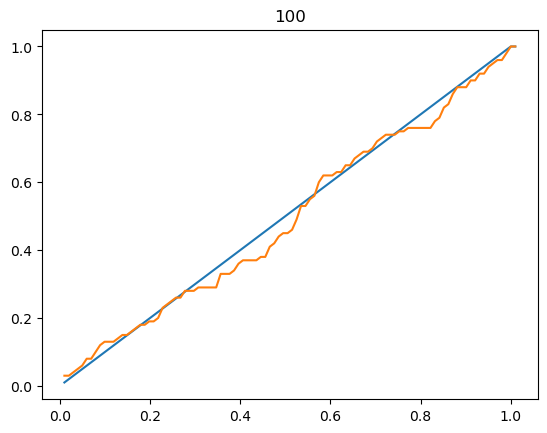

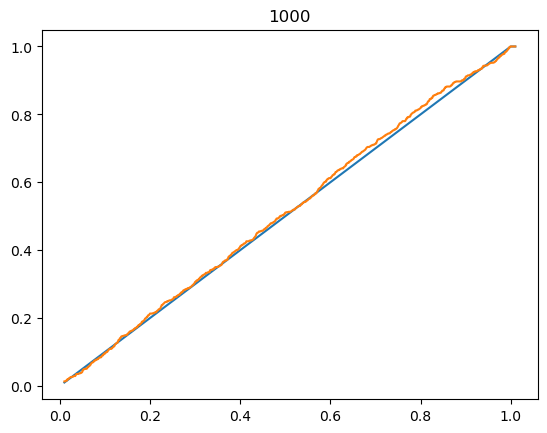

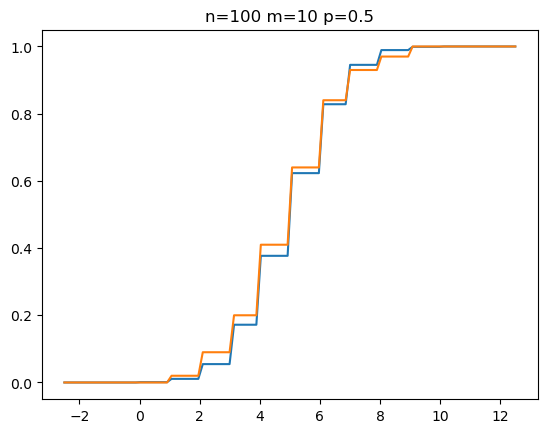

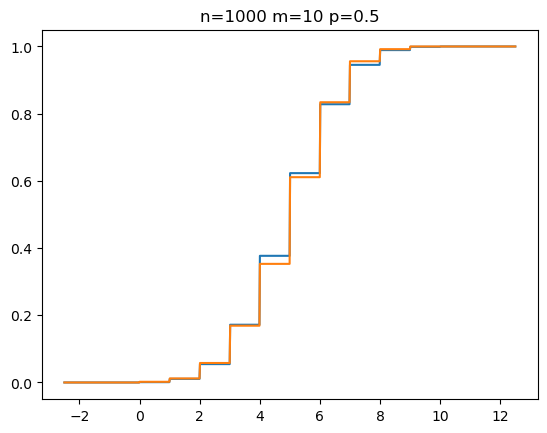

In [13]:
def ecdf(X,x):
	Y=np.sort(X)
	if x<Y[1]:
		return 0
	for i in range(len(Y)-1):
		if x>=Y[i] and x<Y[i+1]:
			return (i+1)/len(Y)
	return 1
nmas=[100,1000]
for n in nmas:
	X=np.random.normal(size=n,loc=0,scale=1)
	x=np.linspace(-3,3,n+2)
	plt.title(str(n))
	plt.plot(x,st.norm.cdf(x,0,1))
	plt.plot(x,[ecdf(X,i) for i in x])
	plt.show()

for n in nmas:
	plt.title(str(n))
	X=np.random.uniform(0,1,size=n)
	x=np.linspace(0.01,1.01,n+2)
	plt.plot(x,st.uniform.cdf(x,0,1))
	plt.plot(x,[ecdf(X,i) for i in x])
	plt.show()

string=input("m in Binom")
m=[int(string) if string!='' else 10][0]
string=input("p in Binom")
p=[float(string) if string!='' else 0.5][0]
for n in nmas:
	plt.title('n='+str(n)+' m='+str(m)+' p='+str(p))
	X=np.random.binomial(m,p,size=n)
	x=np.linspace(m*p-3*m*p*(1-p),m*p+3*m*p*(1-p),n+2)
	plt.plot(x,st.binom.cdf(x,m,p))
	plt.plot(x,[ecdf(X,i) for i in x])
	plt.show()

2) Построить 95% доверительную полосу для ф.р., используя 

а) критерий Колмогорова

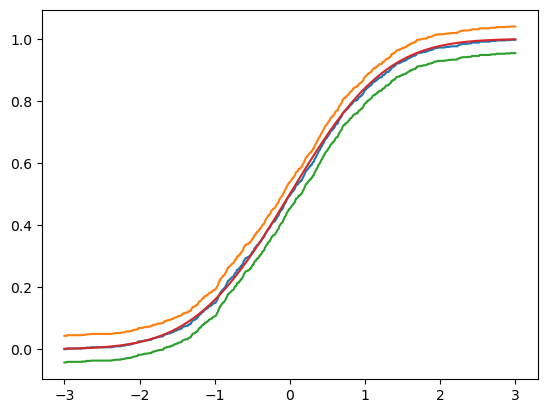

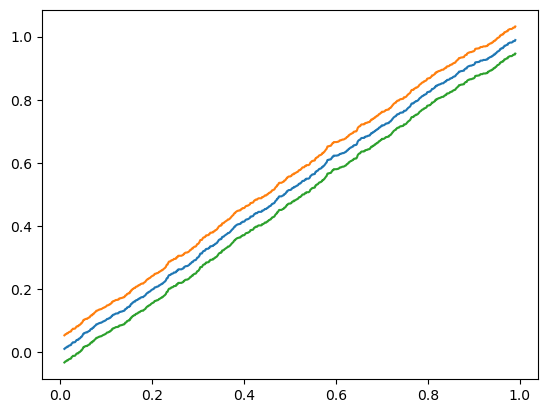

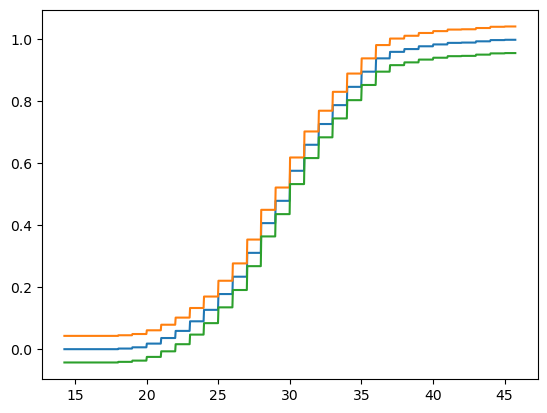

In [15]:
def ecdf(X,x):
	Y=np.sort(X)
	if x<Y[1]:
		return 0
	for i in range(len(Y)-1):
		if x>=Y[i] and x<Y[i+1]:
			return (i+1)/len(Y)
	return 1
#P(sqrt(n)*sup|F^(x)-F(x)|<=y)->K(y)
#P(sup|F^(x)-F(x)|<=y/sqrt(n))->0.95
#F(x)<F^(x)=>F(x)=F^(x)-y/sqrt(n)
#F(x)>F^(x)=>F(x)=F^(x)+y/sqrt(n)
string=input()
n=[int(string) if string!='' else 1000][0]
y=sp.kolmogi(0.05)

X=np.random.normal(size=n,loc=0,scale=1)
x=np.linspace(-3,3,n+2)
emp=[ecdf(X,i) for i in x]
plt.plot(x,emp)
plt.plot(x,[i+y/n**0.5 for i in emp])
plt.plot(x,[i-y/n**0.5 for i in emp])
plt.plot(x,st.norm.cdf(x,0,1))
plt.show()

X=np.random.uniform(0,1,size=n)
x=np.linspace(0.01,0.99,n+2)
emp=[ecdf(X,i) for i in x]
plt.plot(x,emp)
plt.plot(x,[i+y/n**0.5 for i in emp])
plt.plot(x,[i-y/n**0.5 for i in emp])
plt.show()

string=input()
m=[int(string) if string!='' else 100][0]
string=input()
p=[float(string) if string!='' else 0.3][0]
X=np.random.binomial(m,p,size=n)
x=np.linspace(m*p-0.75*m*p*(1-p),m*p+0.75*m*p*(1-p),n+2)
emp=[ecdf(X,i) for i in x]
plt.plot(x,emp)
plt.plot(x,[i+y/n**0.5 for i in emp])
plt.plot(x,[i-y/n**0.5 for i in emp])
plt.show()

б) неравенство Дворецкого-Кифера-Вольфовица.

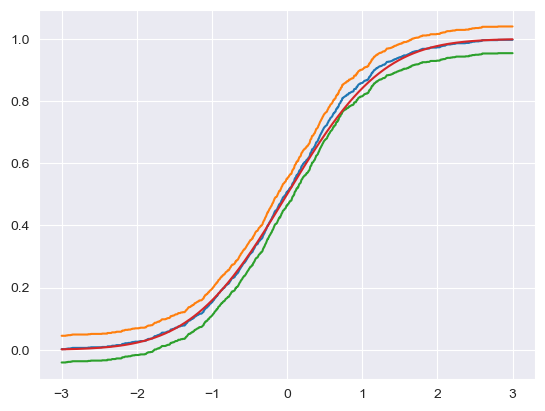

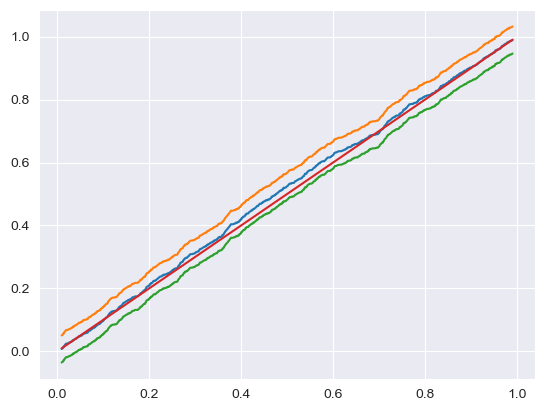

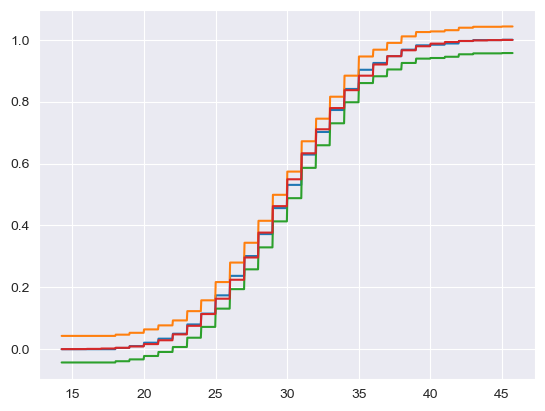

In [20]:
def ecdf(X,x):
	Y=np.sort(X)
	if x<Y[1]:
		return 0
	for i in range(len(Y)-1):
		if x>=Y[i] and x<Y[i+1]:
			return (i+1)/len(Y)
	return 1
#P(sup|F^(x)-F(x)|>=y)<=2*e^(2n*y^2)
#2*e^(-2n*y^2)=0.05=>-2*n*y^2=ln(1/40)=-ln(40)=>y=(ln(40)/(2n))^0.5
#|F^(x)-F(x)|<=y=>F(x)=F^(x)+y,F(x)=F^(x)-y
string=input()
n=[int(string) if string!='' else 1000][0]
y=(math.log(40)/2/n)**0.5
X=np.random.normal(size=n,loc=0,scale=1)
x=np.linspace(-3,3,n+2)
emp=[ecdf(X,i) for i in x]
plt.plot(x,emp)
plt.plot(x,[i+y for i in emp])
plt.plot(x,[i-y for i in emp])
plt.plot(x,st.norm.cdf(x,0,1))
plt.show()

X=np.random.uniform(0,1,size=n)
x=np.linspace(0.01,0.99,n+2)
emp=[ecdf(X,i) for i in x]
plt.plot(x,emp)
plt.plot(x,[i+y for i in emp])
plt.plot(x,[i-y for i in emp])
plt.plot(x,st.uniform.cdf(x,0,1))
plt.show()

string=input()
m=[int(string) if string!='' else 100][0]
string=input()
p=[float(string) if string!='' else 0.3][0]
X=np.random.binomial(m,p,size=n)
x=np.linspace(m*p-0.75*m*p*(1-p),m*p+0.75*m*p*(1-p),n+2)
emp=[ecdf(X,i) for i in x]
plt.plot(x,emp)
plt.plot(x,[i+y for i in emp])
plt.plot(x,[i-y for i in emp])
plt.plot(x,st.binom.cdf(x,m,p))
plt.show()

2. С помощью критерия Колмогорова проверить гипотезу H0 : Xi ∼ N (0, 1), если Xi = (Yi − EYi)/√DYi, где
Построить графики p-value для m = 1, 2, 5, 20. Рассмотреть выборки длины n = 50, 100, 500.

(a) Yi ∼ N (−3, 8),

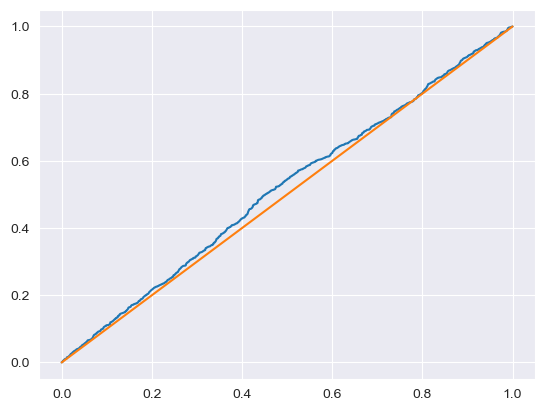

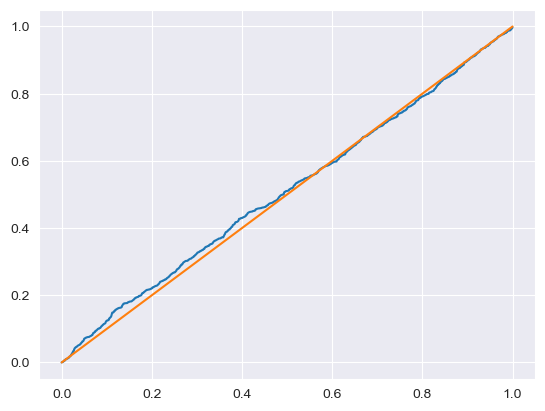

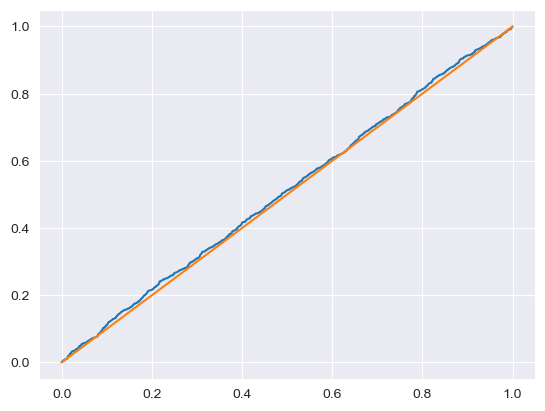

In [31]:
nmas=[50,100,500]
for i in range(3):
	pval=[]
	for j in range(1000):
		n=nmas[i]
		Y=np.random.normal(size=n,loc=-3,scale=8**0.5)
		X=(Y+3)/8**0.5
		pval.append(st.kstest(X,'norm')[1])
	x=np.linspace(0,1,1000)
	plt.plot(x,np.sort(pval))
	plt.plot(x,x)
	plt.show()

(b) Yi ∼ Bin(m, 1/2),

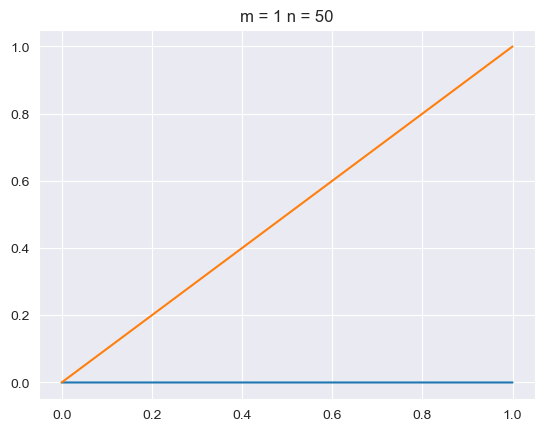

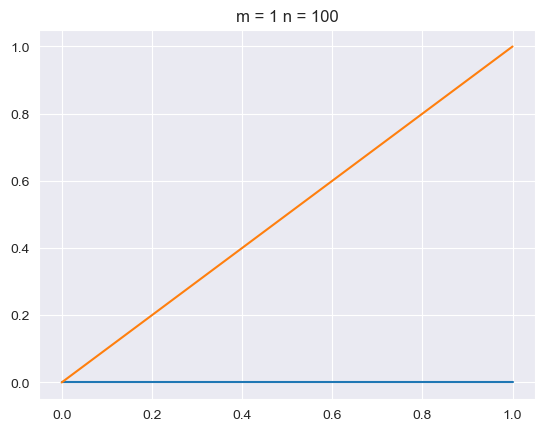

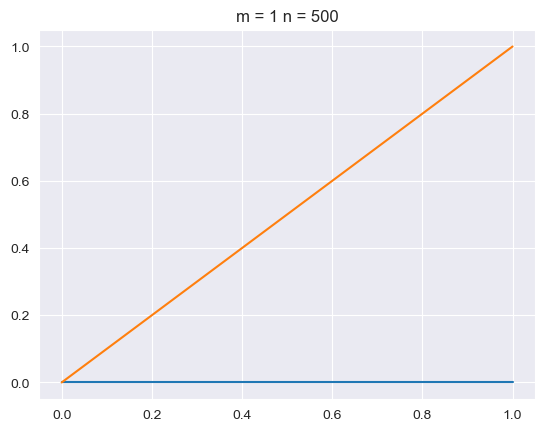

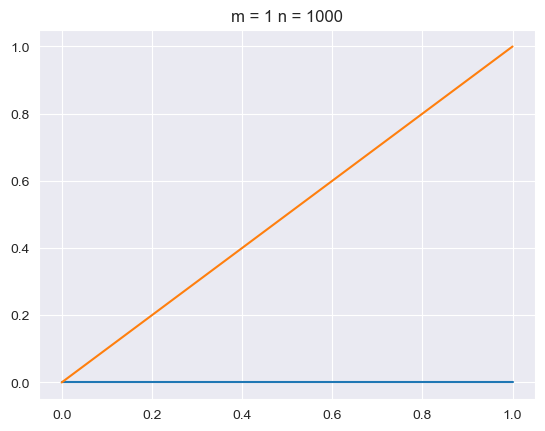

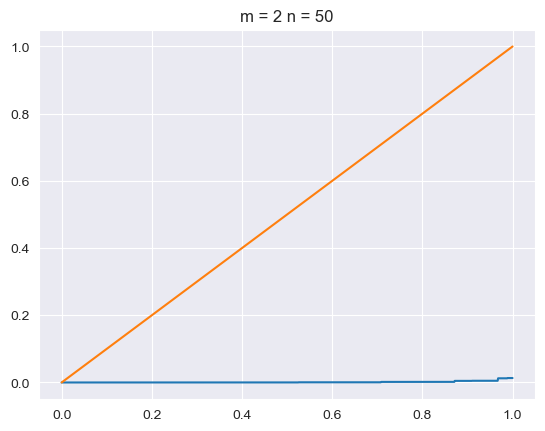

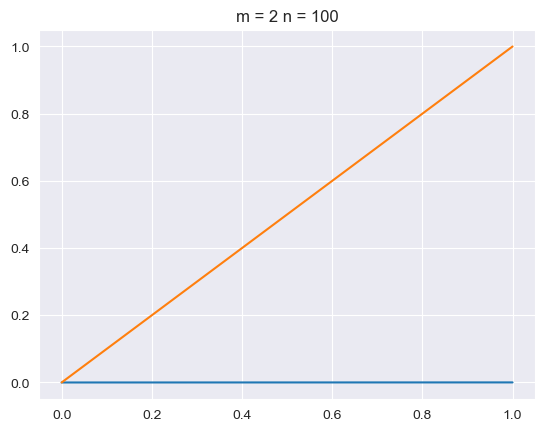

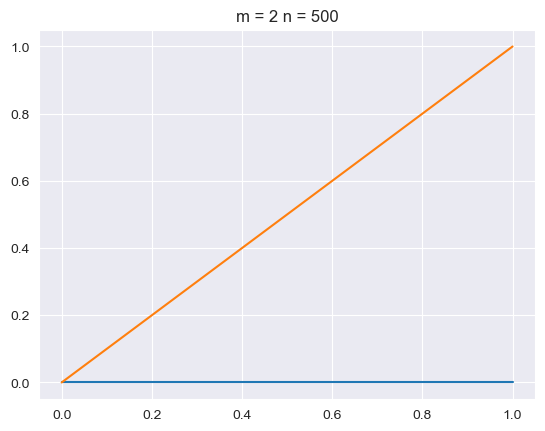

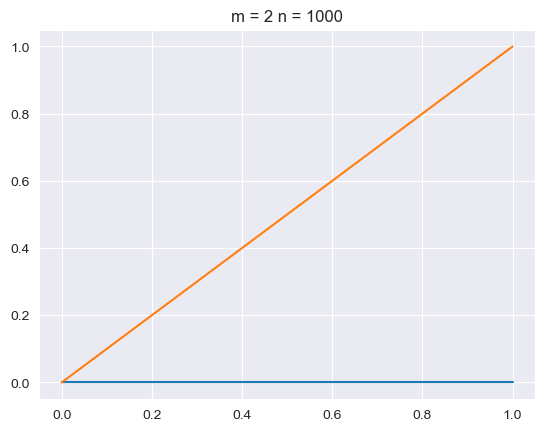

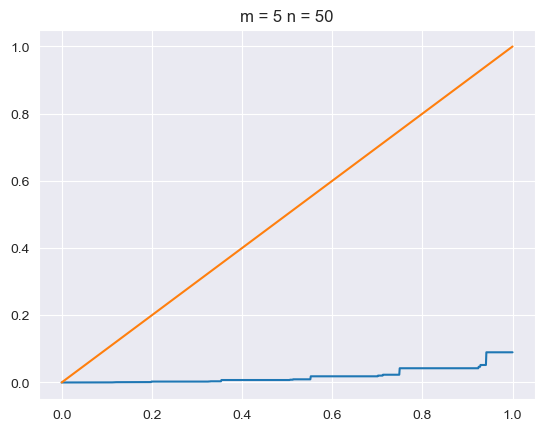

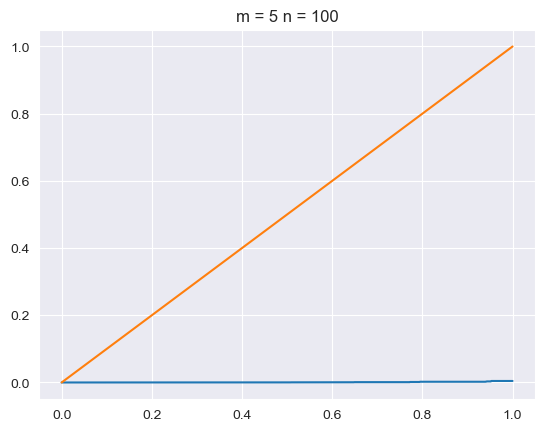

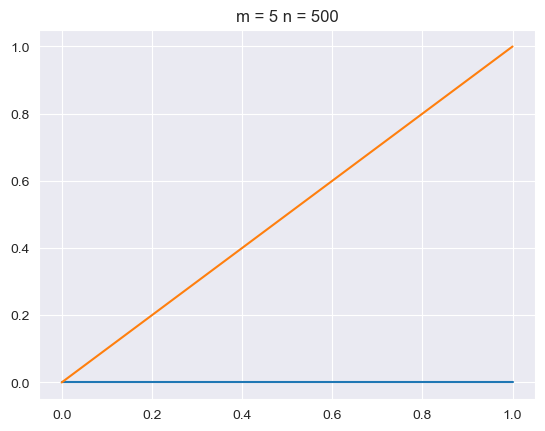

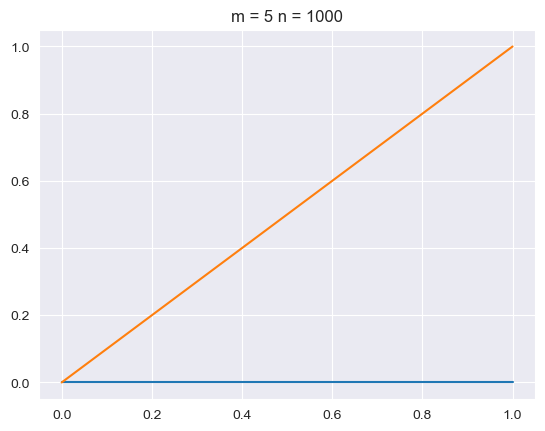

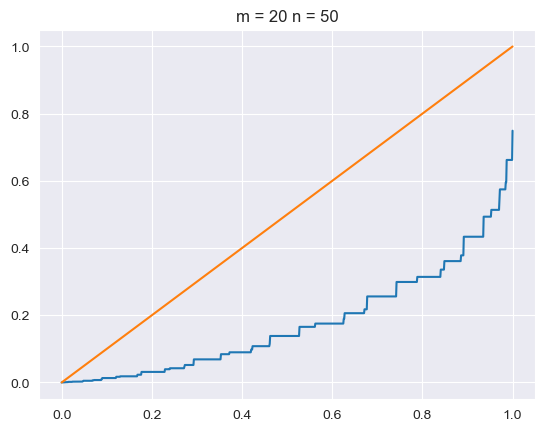

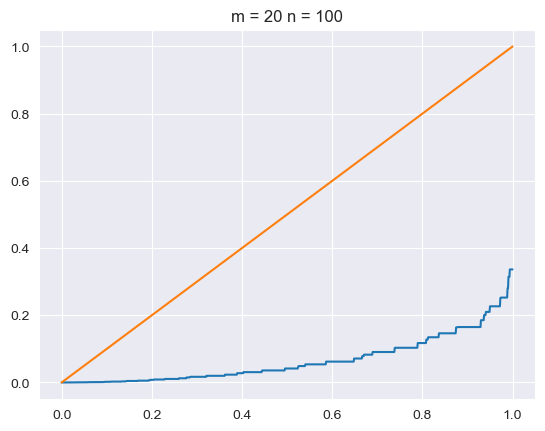

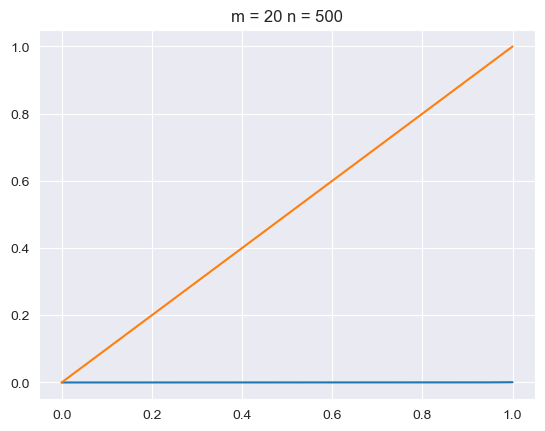

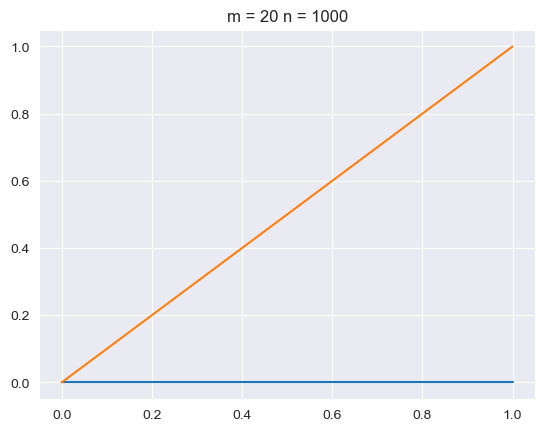

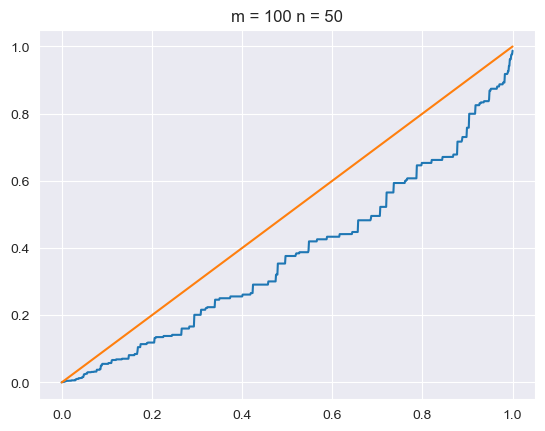

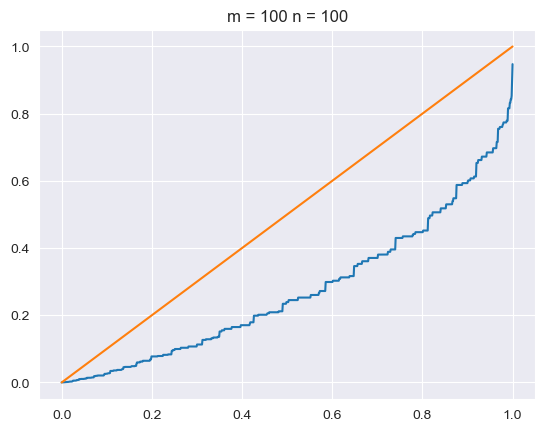

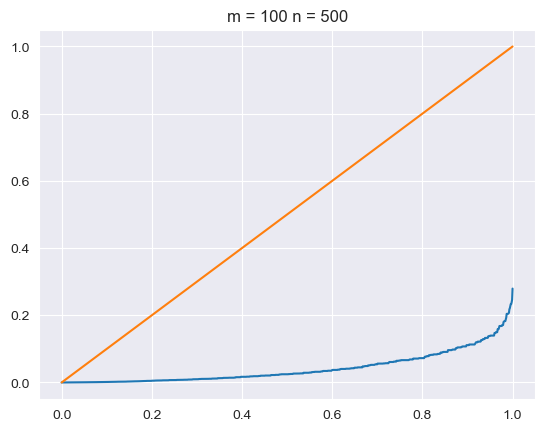

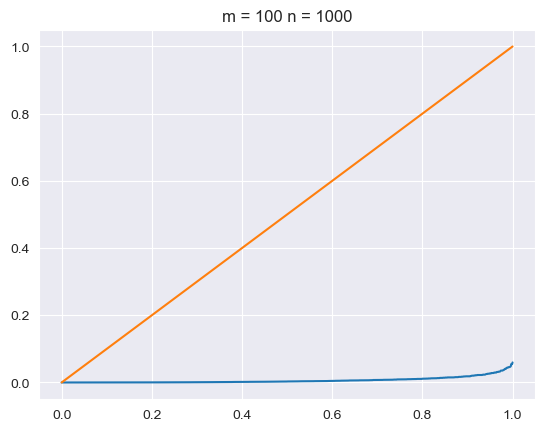

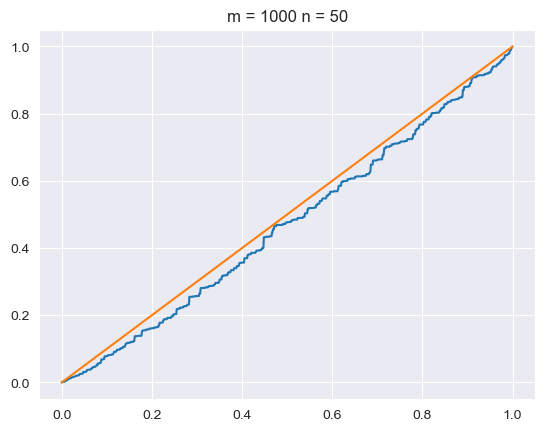

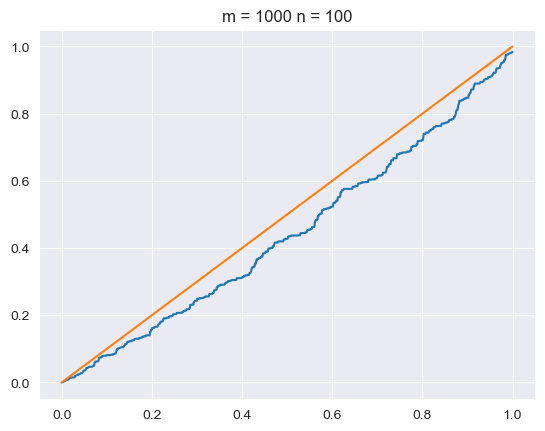

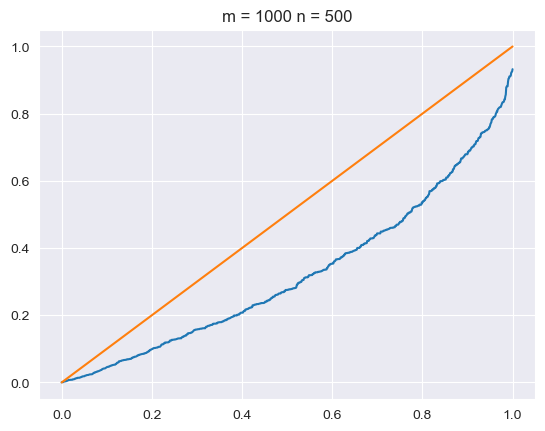

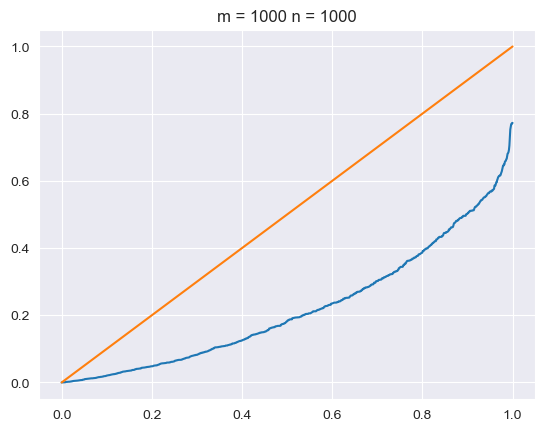

In [61]:
nmas=[50,100,500,1000]
mmas=[1,2,5,20,100,1000]
for m in mmas:
	for siz in nmas:
		pval=[]
		for j in range(1000):
			Y=np.random.binomial(size=siz,n=m,p=1/2)
			X=(Y-m/2)/m**0.5/0.5
			pval.append(st.kstest(X,'norm')[1])
		x=np.linspace(0,1,1000)
		plt.title('m = '+str(m)+' n = '+str(siz))
		plt.plot(x,np.sort(pval))
		plt.plot(x,x)
		plt.show()

(c) Yi имеют распределение Ирвина–Холла (сумма m независимых равномерных с.в.).

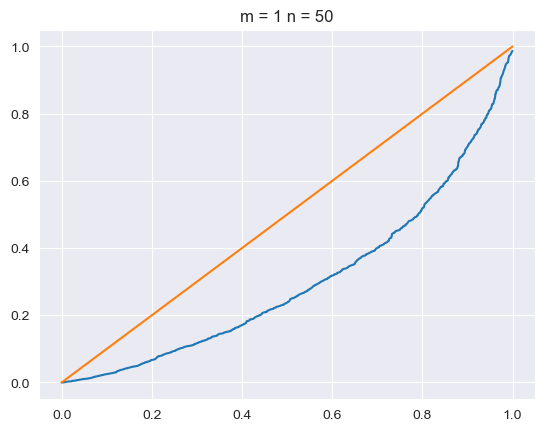

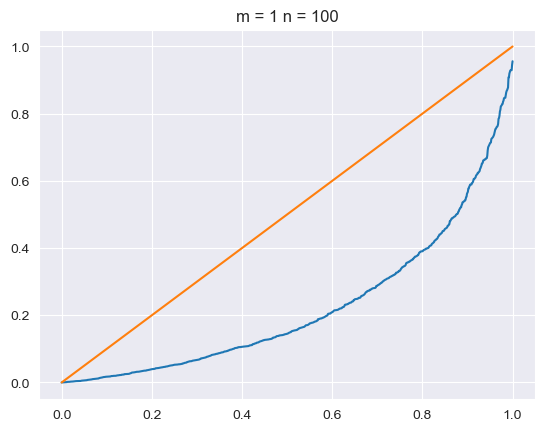

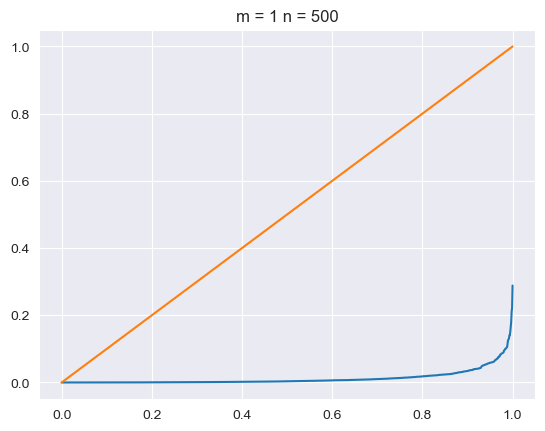

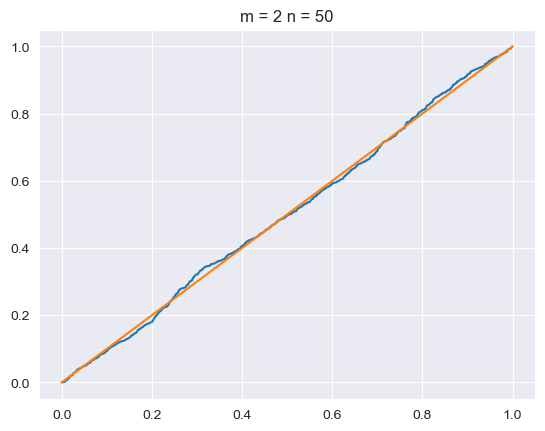

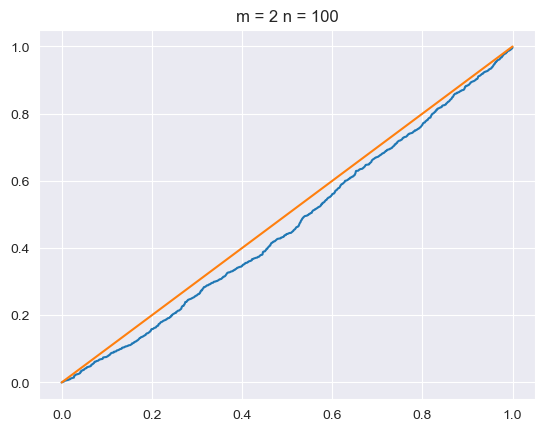

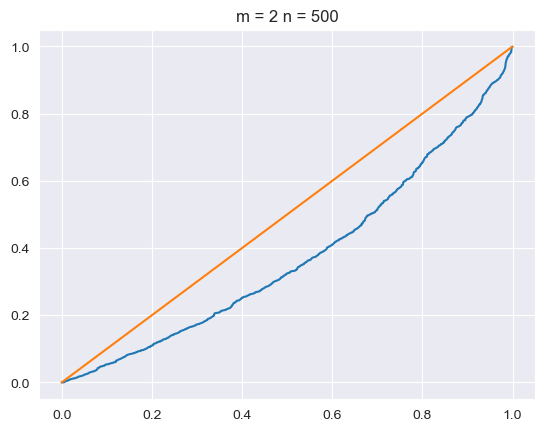

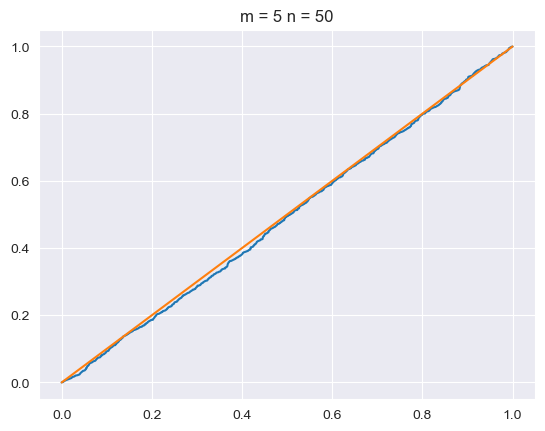

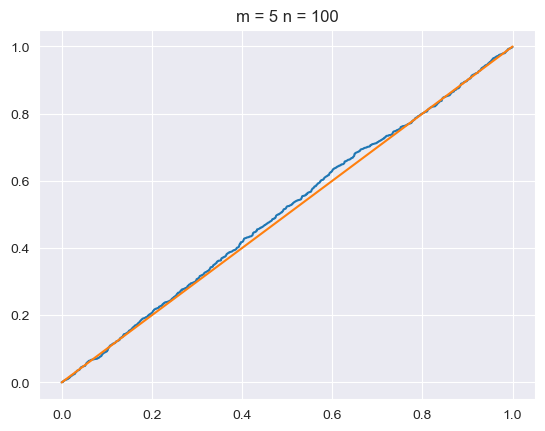

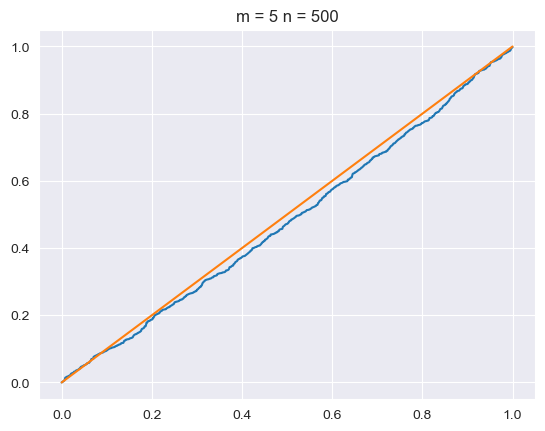

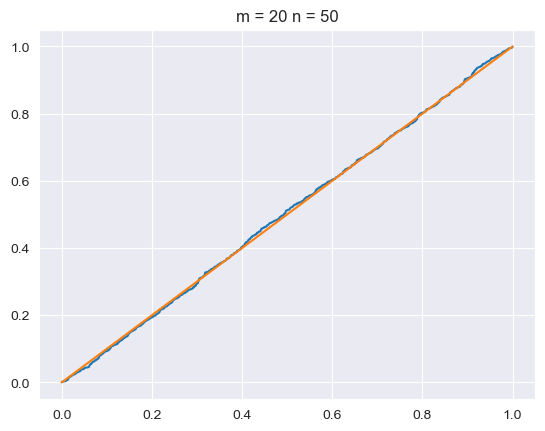

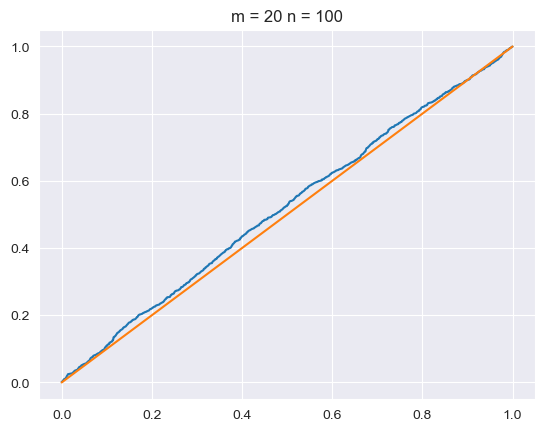

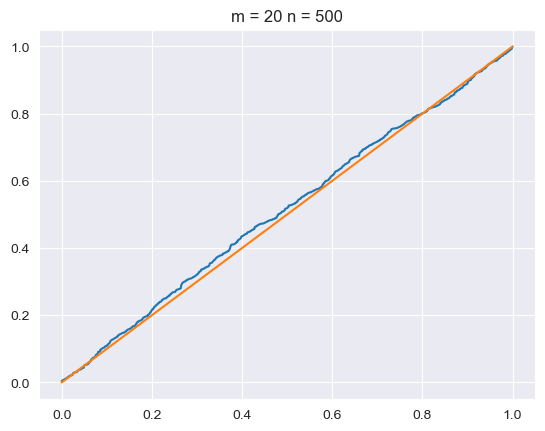

In [47]:
nmas=[50,100,500]
mmas=[1,2,5,20]
for m in mmas:
	for i in range(3):
		pval=[]
		for j in range(1000):
			n=nmas[i]
			Y=np.zeros(n)
			for z in range(n):
				Y[z]=np.sum(np.random.uniform(size=m,low=0,high=1))
			X=(Y-m/2)/(m/12)**0.5
			pval.append(st.kstest(X,'norm')[1])
		x=np.linspace(0,1,1000)
		plt.title('m = '+str(m)+' n = '+str(n))
		plt.plot(x,np.sort(pval))
		plt.plot(x,x)
		plt.show()

3. Если выборка имеет нормальное распределение с неизвестными параметрами, то можно попробовать перейти от выборки Xi к (Xi−X)/S и применить к ним критерий Колмогорова нормальности N (0, 1). Построить график p-value при верной гипотезе и посмотреть корректно ли работает ”модифицированный” критерий.

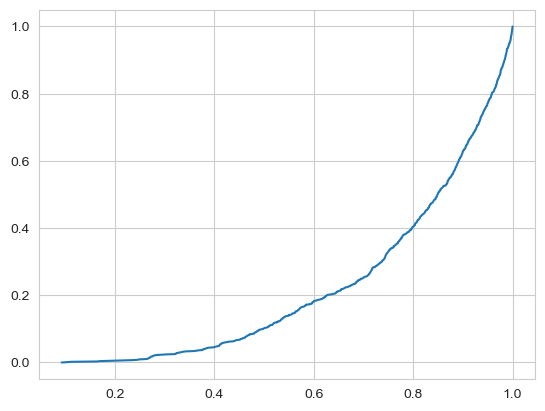

In [3]:
string=input()
mu=[float(string) if string!='' else np.random.uniform(size=1,low=-10,high=10)[0]][0]
string=input()
sigma=[float(string) if string!='' else np.random.uniform(size=1,low=0.1,high=3)[0]][0]
#H0: X~N(smth,smth)
string=input()
n=[int(string) if string!='' else 1000][0]
pval=[]
for i in range(1000):
	X=np.random.normal(size=n,loc=mu,scale=sigma)
	Y=(X-np.mean(X))/np.std(X)
	pval.append(st.kstest(Y,'norm')[1])
x=np.linspace(0,1,1000)
plt.plot(np.sort(pval),x)
plt.show()